In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to ignore any warning if it comes
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
airline = pd.read_csv("C:\Data_Science\Jigsaw Academy\dataFiles\ML\data_files\AirPassengers.csv", index_col='Month', parse_dates=True)

In [9]:
airline.shape

(144, 1)

In [10]:
airline.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [12]:
airline['1952']
## used to check whether the String format has been converted to the Date format, if the rows gets displayed then it is correct
## as shown below

#Passengers
Month                  
1952-01-01          171
1952-02-01          180
1952-03-01          193
1952-04-01          181
1952-05-01          183
1952-06-01          218
1952-07-01          230
1952-08-01          242
1952-09-01          209
1952-10-01          191
1952-11-01          172
1952-12-01          194

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

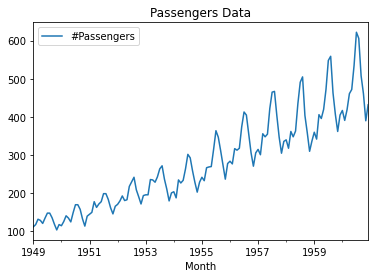

In [13]:
airline[['#Passengers']].plot(title = 'Passengers Data')

In [14]:
## we can see the upward trend - as the year increases, no of passengers also increase

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

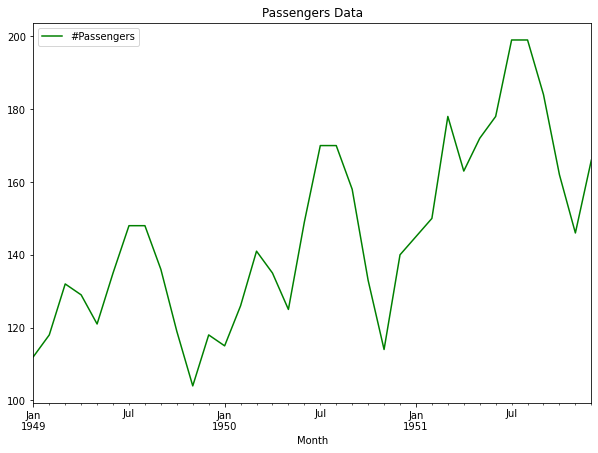

In [18]:
airline[['#Passengers']][0:36].plot(title = 'Passengers Data' , figsize = (10,7), color = 'green')

In [16]:
## this is a Seasonal data - after every regular interval the pattern is repeating

In [19]:
decompose_result = seasonal_decompose(airline['#Passengers'], model='multiplicative')

In [20]:
decompose_result.plot();

In [21]:
# first plot is the original data
# next 3 are the different trends
# last one is the residual

In [22]:
decompose_result = seasonal_decompose(airline['#Passengers'], model='additive')

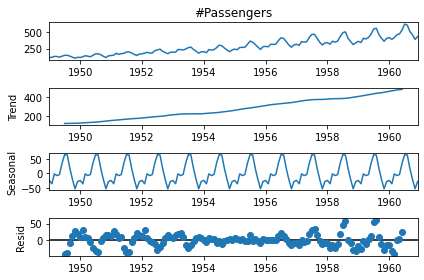

In [24]:
decompose_result.plot();

In [28]:
airline.rename(columns={'#Passengers':'Passengers'}, inplace=True)
## renaming a column

In [27]:
airline.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

### Fitting the data with Holt-Winters Exponential Smoothing - 

In [29]:
# specify the frequency of the date time index as Monthly start as indicated by the data
airline.index.freq = 'MS'
# set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

#### Single HWES - 

<AxesSubplot:title={'center':'Holt Winters Exponential Smoothing'}, xlabel='Month'>

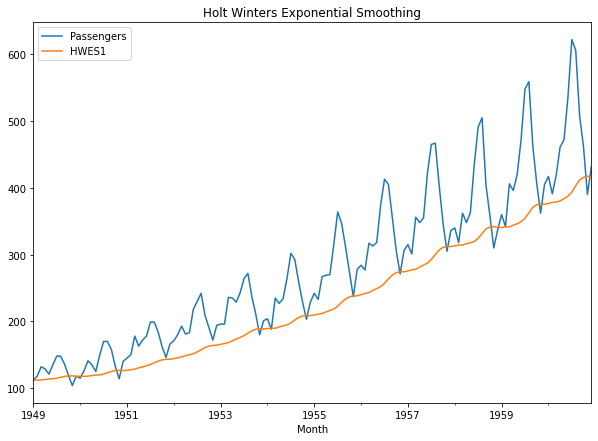

In [30]:
airline['HWES1'] = SimpleExpSmoothing(airline['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues

airline[['Passengers', 'HWES1']].plot(title= 'Holt Winters Exponential Smoothing', figsize = (10,7))
# plt.show()

#### Double HWES - 

In [31]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Passengers'], trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Passengers'], trend='mul').fit().fittedvalues

airline.head()

Passengers       HWES1   HWES2_ADD   HWES2_MUL
Month                                                     
1949-01-01         112  112.000000  120.527273  120.527273
1949-02-01         118  112.000000  114.102394  113.990701
1949-03-01         132  112.250000  120.040657  120.031669
1949-04-01         129  113.072917  134.001539  134.235979
1949-05-01         121  113.736545  131.085845  131.270786

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

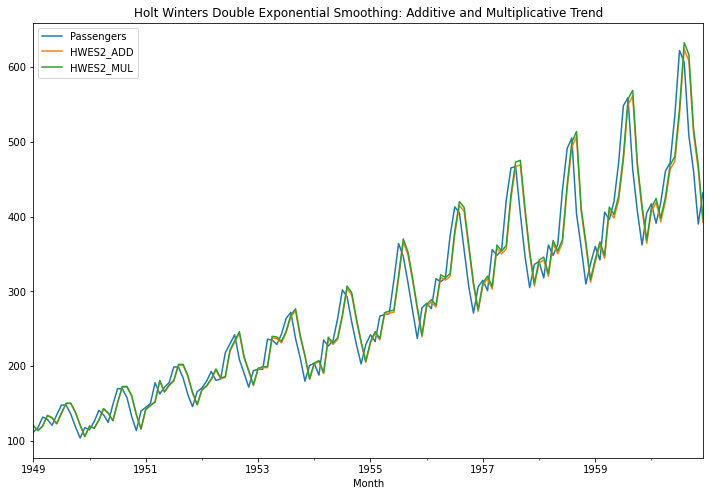

In [37]:
airline[['Passengers', 'HWES2_ADD', 'HWES2_MUL']].plot(
    title = 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize = (12,8))

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive, Multiplicative and Single HWES Trend'}, xlabel='Month'>

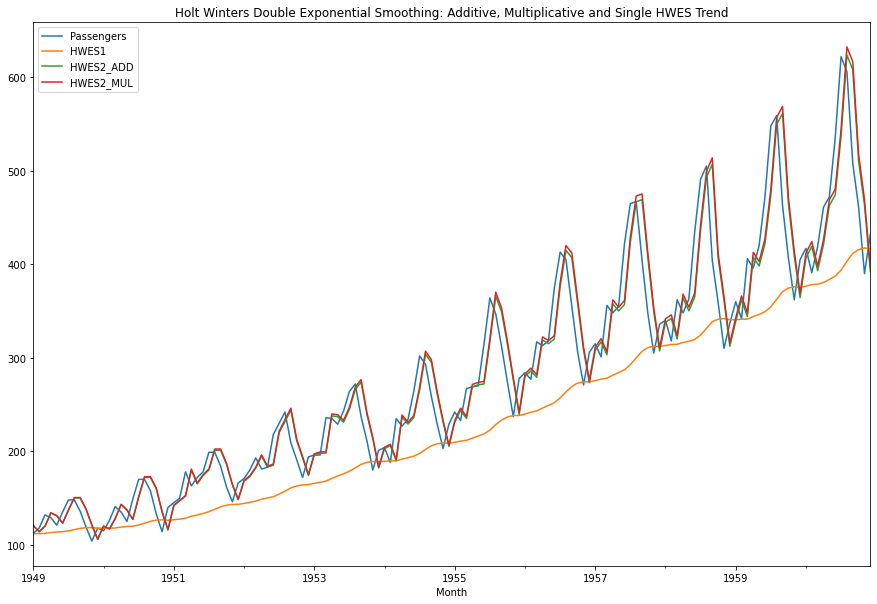

In [42]:
airline[['Passengers', 'HWES1','HWES2_ADD', 'HWES2_MUL']].plot(
    title = 'Holt Winters Double Exponential Smoothing: Additive, Multiplicative and Single HWES Trend', figsize = (15,10))

* thus, double HWES is far better than single HWES as there are less deviations.
* still after double HWES we go for triple HWES.

#### Triple HWES - 

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

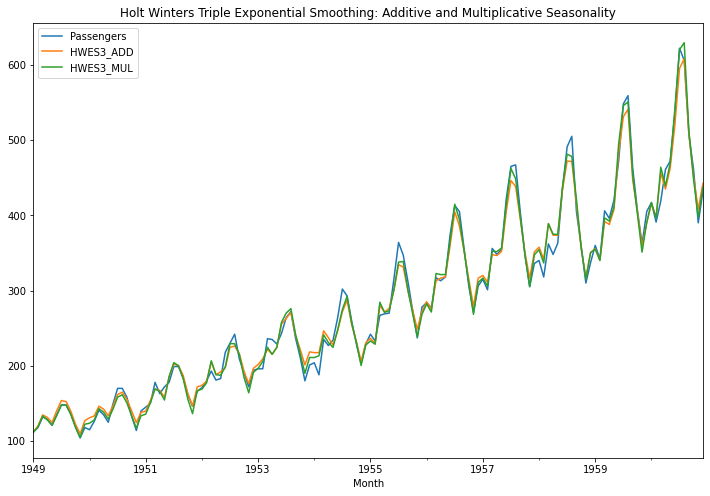

In [43]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['Passengers'], trend = 'add', seasonal='add', 
                                            seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Passengers'], trend = 'mul', 
                                            seasonal='mul', seasonal_periods=12).fit().fittedvalues

airline[['Passengers', 'HWES3_ADD', 'HWES3_MUL']].plot(
    title = 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize = (12,8))

* here, it is overlapping with the original dataset, so triple HWES is better amongst double HWES and single HWES

* here in all the graphs, orange and green are the predicted lines and blue is the actual line(original data)

### Forecasting with Holt-Winters Exponential Smoothing (Triple ES) - 

* Split the data set into training and test set
* take first 120 data points as Train set and last 24 points as Test set
* Here we cannot use 'train_test_split'

In [48]:
forecast_data = pd.read_csv('C:\Data_Science\Jigsaw Academy\dataFiles\ML\data_files\AirPassengers.csv', 
                            index_col='Month', parse_dates=True)

In [49]:
forecast_data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [50]:
forecast_data.index.freq = 'MS' ## although not required, only need in case of single smoothing
# split into train and test set - 
train_airline = forecast_data[:120]
test_airline = forecast_data[120:]

In [51]:
fitted_model = ExponentialSmoothing(train_airline['Passengers'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit()

In [52]:
forecast_data.head(2)

Passengers
Month                 
1949-01-01         112
1949-02-01         118

In [53]:
forecast_data['1949']

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118

In [54]:
train_airline.head(3)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

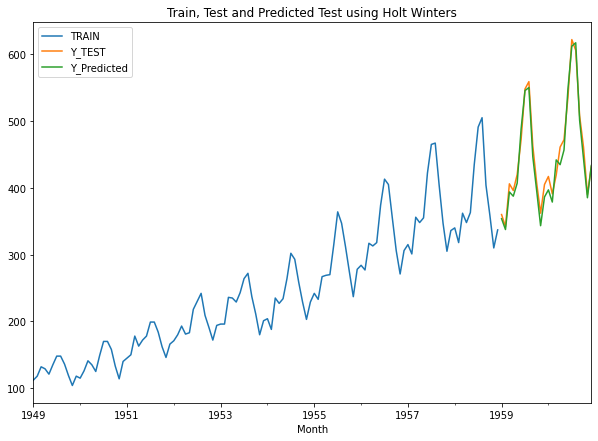

In [58]:
test_predictions = fitted_model.forecast(24) # this is the predicted dataset
train_airline['Passengers'].plot(legend=True, label='TRAIN', figsize = (10,7))
test_airline['Passengers'].plot(legend=True, label='Y_TEST', figsize = (10,7))

test_predictions.plot(legend=True,label= 'Y_Predicted', figsize = (10,7))
plt.title('Train, Test and Predicted Test using Holt Winters')

#### Understanding the data through the Evaluation Metrics - 

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
print(f'the mean absolute error is = {mean_absolute_error(test_airline, test_predictions)}')
print(f'the mean squared error is = {mean_squared_error(test_airline, test_predictions)}')
print(f'the R- Squared value is = {r2_score(test_airline,test_predictions)}')

the mean absolute error is = 12.380740498655134
the mean squared error is = 192.61571096096839
the R- Squared value is = 0.9654605514544309


* here, since the R-Squared value is very high, very close to 1 (0.96) so it is a very good model.